### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

Import pandas, numpy

In [1]:
import pandas as pd
import numpy as np

# 1. Open the data using read_csv and give it a name complains

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [2]:
complains=pd.read_csv('311-service-requests.csv',dtype='unicode')

In [3]:
complains

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"


# 2. What's even in it? (the summary)


In [4]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique Key                      111069 non-null  object
 1   Created Date                    111069 non-null  object
 2   Closed Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency Name                     111069 non-null  object
 5   Complaint Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location Type                   79022 non-null   object
 8   Incident Zip                    98807 non-null   object
 9   Incident Address                84441 non-null   object
 10  Street Name                     84432 non-null   object
 11  Cross Street 1                  84728 non-null   object
 12  Cross Street 2                

In [5]:
complains.describe()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
count,111069,111069,60270,111069,111069,111069,110613,79022,98807,84441,...,185,185,180,219,49,24,70,98143,98143,98143
unique,111069,57872,35596,26,135,165,788,90,248,41189,...,37,38,2,160,17,2,39,50653,50505,50653
top,26434829,10/24/2013 12:00:00 AM,10/28/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11226,130 AUDUBON AVENUE,...,BQE/Gowanus Expwy,East/Long Island Bound,Roadway,Roadway,Flushing #1 Field,Staten Island Bound,Unknown,40.842708163812766,-73.93675169432969,"(40.842708163812766, -73.93675169432969)"
freq,1,3659,1359,39067,39067,14200,14126,39067,1996,120,...,24,22,127,11,12,13,14,120,120,120


In [6]:
complains.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [7]:
complains.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"
111068,26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024057399216,-73.90071711703163,"(40.640024057399216, -73.90071711703163)"


## spaces in column names are replaced with ‘_’

In [8]:
complains.columns=[column.replace(" ", "_") for column in complains]

# 3. Convert the data time columns in the data set from object to datetime format

In [9]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique_Key                      111069 non-null  object
 1   Created_Date                    111069 non-null  object
 2   Closed_Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency_Name                     111069 non-null  object
 5   Complaint_Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location_Type                   79022 non-null   object
 8   Incident_Zip                    98807 non-null   object
 9   Incident_Address                84441 non-null   object
 10  Street_Name                     84432 non-null   object
 11  Cross_Street_1                  84728 non-null   object
 12  Cross_Street_2                

In [10]:
pd.datetime.now()

<ipython-input-10-2c4a3ef4aee4>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.now()


datetime.datetime(2022, 2, 10, 12, 17, 21, 557228)

In [11]:
complains['Created_Date']=pd.to_datetime(complains['Created_Date'])
complains['Closed_Date']=pd.to_datetime(complains['Closed_Date'])

In [12]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Closed_Date                     60270 non-null   datetime64[ns]
 3   Agency                          111069 non-null  object        
 4   Agency_Name                     111069 non-null  object        
 5   Complaint_Type                  111069 non-null  object        
 6   Descriptor                      110613 non-null  object        
 7   Location_Type                   79022 non-null   object        
 8   Incident_Zip                    98807 non-null   object        
 9   Incident_Address                84441 non-null   object        
 10  Street_Name                     84432 non-null   object 

# 4. Drop all the columns where most of the rows are null. Think logically

In [13]:
complains.drop(['Landmark', 'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough', 
                'Taxi_Pick_Up_Location', 'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment', 
                'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Terminal_Name', 'School_Code', 'School_Phone_Number'], 
               axis=1, inplace=True)

# 5. Select the column name `Complaint_Type`,  
## find out no. of unique values in the series or data, 
## print top 5 rows of the data

In [14]:
complains["Complaint_Type"]

0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint_Type, Length: 111069, dtype: object

# 6. Selecting multiple columns
What if we just want to know the complaint type and the borough, but not the rest of the information?

In [15]:
complains[['Complaint_Type', 'Borough']]

,Complaint_Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


# 7. Rename the `Borough` to `District`

In [16]:
complains=complains.rename(columns={'Borough':'District'})

In [17]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Closed_Date                     60270 non-null   datetime64[ns]
 3   Agency                          111069 non-null  object        
 4   Agency_Name                     111069 non-null  object        
 5   Complaint_Type                  111069 non-null  object        
 6   Descriptor                      110613 non-null  object        
 7   Location_Type                   79022 non-null   object        
 8   Incident_Zip                    98807 non-null   object        
 9   Incident_Address                84441 non-null   object        
 10  Street_Name                     84432 non-null   object 

# 8. What's the most common complaint type?
display top 10 most common compalin


In [18]:
complains['Complaint_Type'].value_counts()[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint_Type, dtype: int64

# 9. What's the most common `District` the complain came?
display top 10 most and plot them out

<AxesSubplot:>

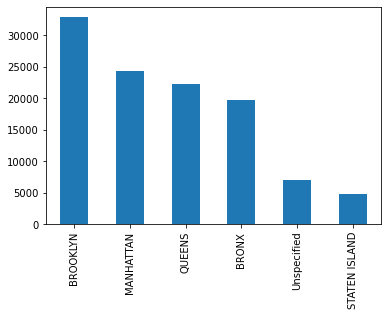

In [19]:
complains['District'].value_counts()[:10].plot(kind='bar')

# 10. Select only top 10 Illegal Parking complains at  Queens district and save it to `new_complaint`. You can use `query`

In [20]:
new_complaint=complains.query('Complaint_Type=="Illegal Parking" & District=="Queens"')

# 11 Filter top 3 columns `Complaint_Type,District, Created_Date,Descriptor` from the new_complaint

In [21]:
new_complaint=new_complaint[['Complaint_Type', 'District', 'Created_Date', 'Descriptor']]

# 12 Save `new_complaint` dataframe to CSV format and load it back to verify the data

In [22]:
new_complaint.to_csv('newdata', index=False)

In [23]:
df=pd.read_csv('newdata', index_col=[0])

In [24]:
df

,District,Created_Date,Descriptor
Complaint_Type,,,
